In [1]:
import pandas as pd
#math operations
import numpy as np
#machine learning
import cv2
import os
from random import shuffle
from tqdm import tqdm
import random
#for opening and loading image
from PIL import Image
#for preprocessing
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#Doing One hot encoding as classifier has multiple classes
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from random import shuffle
#For augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#MobileNetV2 model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Model, layers
from numpy import loadtxt

import itertools
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [4]:
!ls drive

MyDrive  Shareddrives


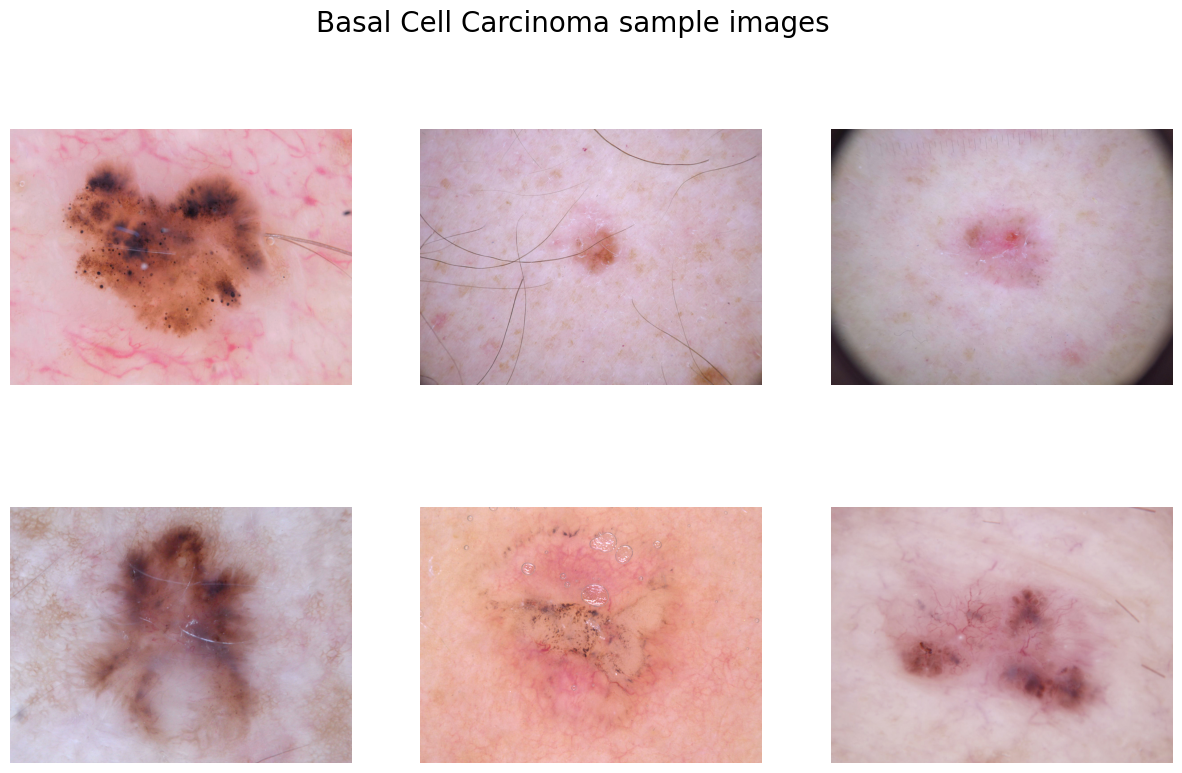

In [17]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Directories for the images
B_DIR = "/content/drive/MyDrive/basal cell carcinoma"
M_DIR = "/content/drive/MyDrive/melanoma"
N_DIR = "/content/drive/MyDrive/nevus"

# Loading images
Bimages = os.listdir(B_DIR)
Mimages = os.listdir(M_DIR)
Nimages = os.listdir(N_DIR)

# Function to display sample images from a directory
def display_samples(images, directory, title, num_samples=6):
    sample_images = random.sample(images, num_samples)
    f, ax = plt.subplots(2, 3, figsize=(15, 9))

    for i in range(num_samples):
        img_path = os.path.join(directory, sample_images[i])
        im = cv2.imread(img_path)

        if im is not None:
            ax[i // 3, i % 3].imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
            ax[i // 3, i % 3].axis('off')
        else:
            print(f"Failed to load image: {img_path}")

    f.suptitle(title, fontsize=20)
    plt.show()

# Display images from each category
display_samples(Bimages, B_DIR, 'Basal Cell Carcinoma sample images')



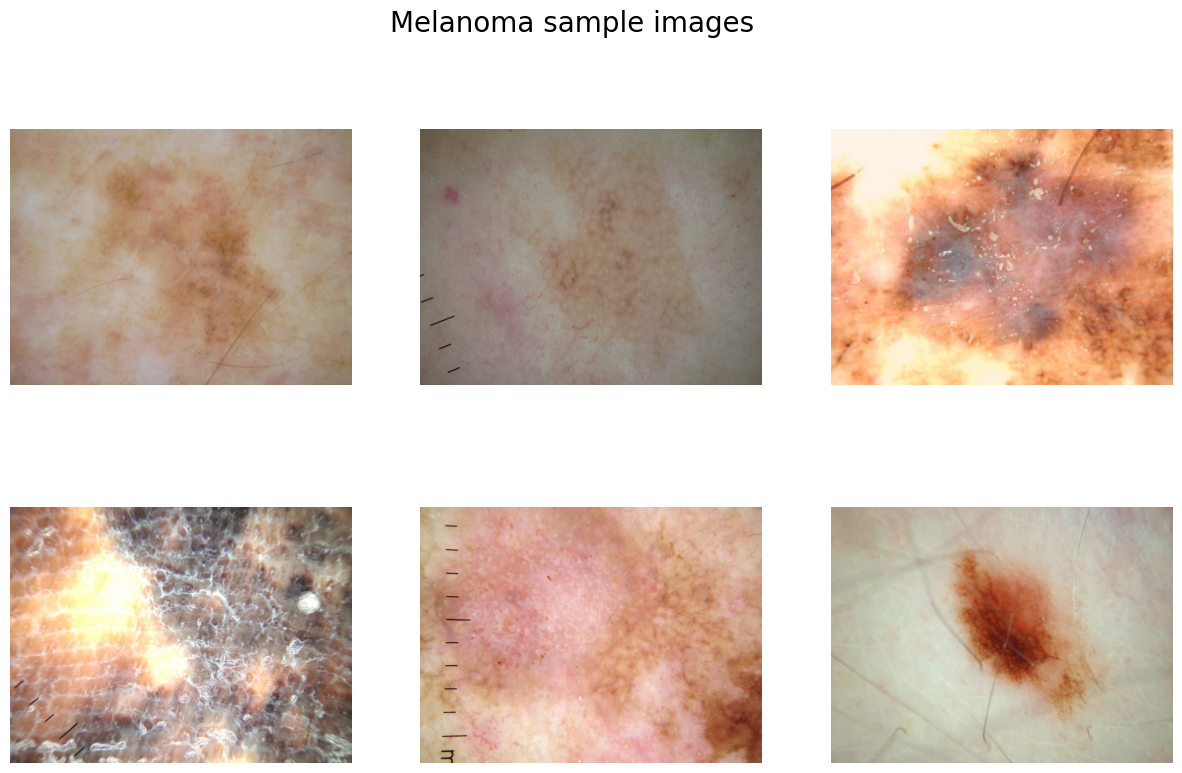

In [18]:
display_samples(Mimages, M_DIR, 'Melanoma sample images')

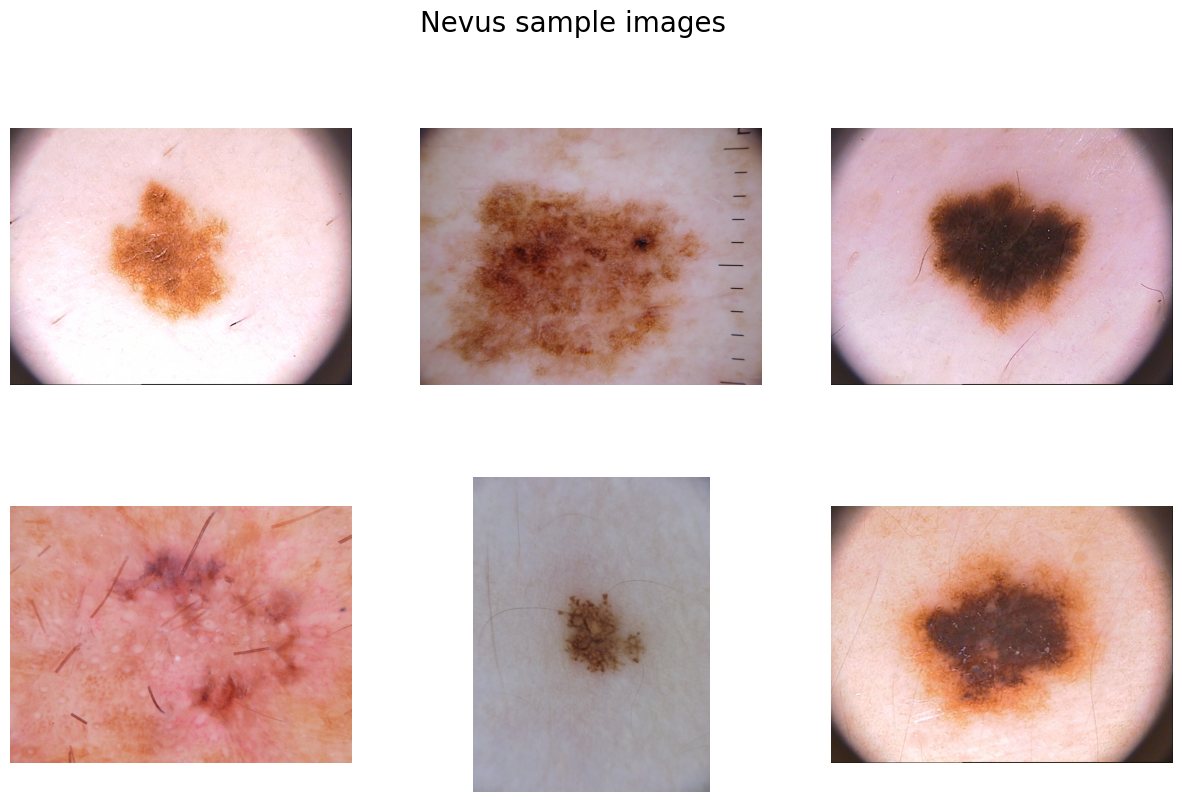

In [19]:
display_samples(Nimages, N_DIR, 'Nevus sample images')

In [20]:
import os
import cv2
import numpy as np
from PIL import Image

# Initialize lists to store data and labels
data = []
labels = []

# Function to process images from a directory
def process_images(dir_path, label, data, labels):
    image_list = os.listdir(dir_path)

    for img_name in image_list:
        try:
            img_path = os.path.join(dir_path, img_name)
            image = cv2.imread(img_path)

            if image is not None:
                image_from_array = Image.fromarray(image, 'RGB')
                resized_image = image_from_array.resize((224, 224))
                data.append(np.array(resized_image))
                labels.append(label)
            else:
                print(f"Failed to load image: {img_path}")

        except AttributeError as e:
            print(f"AttributeError: {e} in file: {img_path}")

# Define directories for each class
basal_dir = "/content/drive/MyDrive/basal cell carcinoma"
melanoma_dir = "/content/drive/MyDrive/melanoma"
nevus_dir = "/content/drive/MyDrive/nevus"

# Process images for each category
process_images(basal_dir, 0, data, labels)   # Label 0 for Basal Cell Carcinoma
process_images(melanoma_dir, 1, data, labels) # Label 1 for Melanoma
process_images(nevus_dir, 2, data, labels)   # Label 2 for Nevus

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} images with corresponding labels.")


Loaded 1171 images with corresponding labels.


In [22]:
import os
import cv2
import numpy as np
from PIL import Image

# ... (rest of your code) ...

# Create the directory if it doesn't exist
os.makedirs("/content/drive/My Drive/skin_cancer_dataset", exist_ok=True)

# saving features and labels for later re-use
np.save("/content/drive/My Drive/skin_cancer_dataset/feats_train",feats)
np.save("/content/drive/My Drive/skin_cancer_dataset/labels_train",labels)

In [23]:
feats=np.load("/content/drive/My Drive/skin_cancer_dataset/feats_train.npy")
labels=np.load("/content/drive/My Drive/skin_cancer_dataset/labels_train.npy")


In [24]:
s=np.arange(feats.shape[0])
np.random.shuffle(s)
feats=feats[s]
labels=labels[s]


In [25]:

num_classes=len(np.unique(labels))
len_data=len(feats)
print(len_data)


1171


In [26]:

print(num_classes)

3


In [27]:
# splitting cells images into 80:20 ratio i.e., 80% for training and 20% for testing purpose
(x_train,x_test)=feats[(int)(0.2*len_data):],feats[:(int)(0.2*len_data)]

(y_train,y_test)=labels[(int)(0.2*len_data):],labels[:(int)(0.2*len_data)]